In [2]:
import easyocr
import re
import cv2
from tqdm.notebook import tqdm
from datetime import datetime
from tools.frame_detector import FrameDetector
from matplotlib import pyplot as plt


In [3]:
video_name = "/home/tzvigr/chaser/test/samples/sample_episode.mp4"
vidcap = cv2.VideoCapture(video_name)
success, image = vidcap.read()
fps = vidcap.get(cv2.CAP_PROP_FPS)
h, w, _ = image.shape
count = 0
frames = []

In [5]:
# get some frames as np array
# pbar = tqdm(total=int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT)))
for count in tqdm(range(int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT)))):
    if not success:
        break
    if count % (2 * fps) == 0:  # every 2 seconds
        success, image = vidcap.read()
        # get frame timestamp
        timestamp = vidcap.get(cv2.CAP_PROP_POS_MSEC) / 1000
        # print(count/(2*fps),  timestamp) # this converts to seconds
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            frames.append(image[h//2:h, w//2:w])
    else:
        ret = vidcap.grab()
    # count += 1
#     pbar.update(1)
# pbar.close()

  0%|          | 0/77932 [00:00<?, ?it/s]

In [1]:
f = [frames[88], frames[405], frames[768], frames[1045]]

reader = easyocr.Reader(['en'], gpu=True)
for i, frame in enumerate(f):
    result = reader.readtext(frame)
    # for j, (rect, text, confidence) in enumerate(result):
    for (rect, text, confidence) in result:
        # print(f"{i=}",f"{j=}",f"{text=}", f"{confidence=}")
        print(f"{i=}",f"{text=}", f"{confidence=}")
        if re.match('1.00|1:00|2:00|2.00', text):
            print(True)
    # for (rect, text, confidence) in result:
    #     print(text)

NameError: name 'frames' is not defined

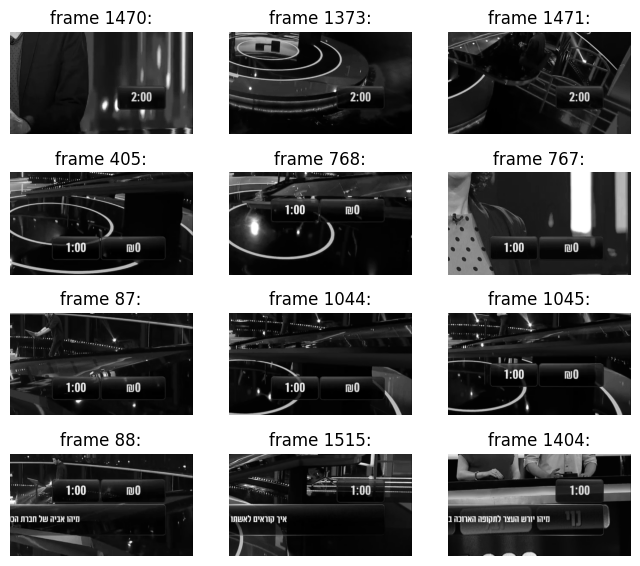

In [52]:
good_frames = map(lambda fr: fr[0],
[(1470, '2.00', 0.9766212701797485),
 (1373, '2.00', 0.9765257239341736),
#  (1472, '2.00', 0.9764188528060913), 
 (1471, '2.00', 0.9757879972457886), 
 (405, '1.00', 0.9577692151069641), 
 (768, '1.00', 0.8181162476539612), 
 (767, '1.00', 0.7735087871551514), 
 (87, '1.00', 0.767864465713501), 
 (1044, '1.00', 0.7639825940132141), 
 (1045, '1.00', 0.7011147737503052), 
 (88, '1.00', 0.5675072073936462), 
 (1515, '1.00', 0.5443403720855713),
 (1404, '1:00', 0.5260469913482666)]
)

# plot all these frames in one figure
fig, axs = plt.subplots(4, 3, figsize=(8,7))
# fig.tight_layout()
axs = axs.flatten()
for i, frame in enumerate(good_frames):
    axs[i].set_title(f"frame {frame}:")
    axs[i].imshow(frames[frame], cmap="gray")
    axs[i].axis('off')   




# for i in good_frames:
#     plt.figure(figsize = (20,4))
#     plt.imshow(frames[i], cmap='gray')
#     plt.show()
    

In [ ]:
detector = FrameDetector(frames)
detector.detect()
print(f"{detector.get_best_results()=}")

In [ ]:
vidcap.release()